### pyBlockSeis - Block Choice Seismic Analysis in Python
Validate against original MATLAB code

#### Acknowledgements
- Python adpation of the Matlab software Block Choice Seismic Analysis (BCseis, version 1.1) by Charles A. Langston and S. Mostafa Mousavi.
- Forward and inverse CWTs functions based on the Synchrosqueezing Toolbox V1.21 by Eugene Brevdo and Gaurav Thakur.  (https://github.com/ebrevdo/synchrosqueezing).

In [1]:
import sys
sys.path.append("src")

import pyblockseis as bcs

import timeit
import numpy as np
import matplotlib.pyplot as plt

from obspy.core import read

Block contains 1 trace(s):
        wave_type: morlet
          nvoices: 16
bandpass_blocking: True
        scale_min: 1.0
        scale_max: 200.0
  block_threshold: 1.0
   estimate_noise: True
  noise_starttime: 0.0
    noise_endtime: 60.0
  noise_threshold: hard
 signal_threshold: hard
    nsigma_method: ECDF
    snr_detection: False
   snr_lowerbound: 1.0



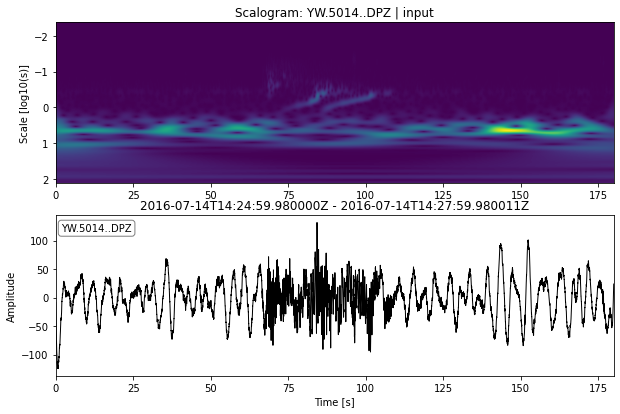

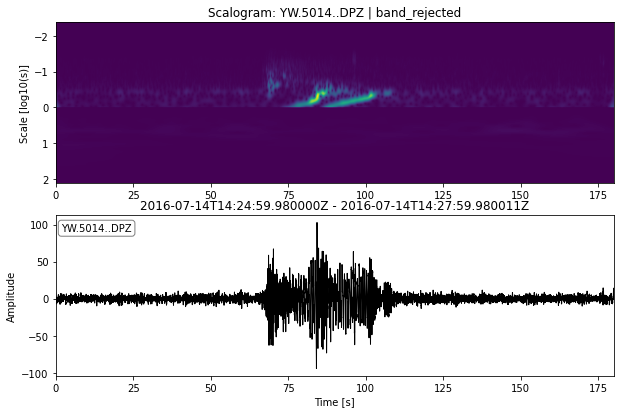

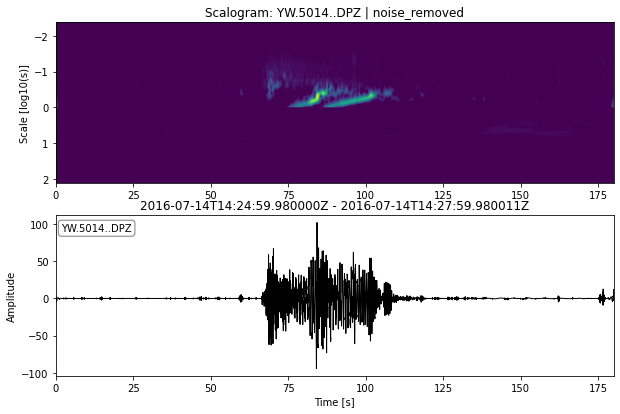

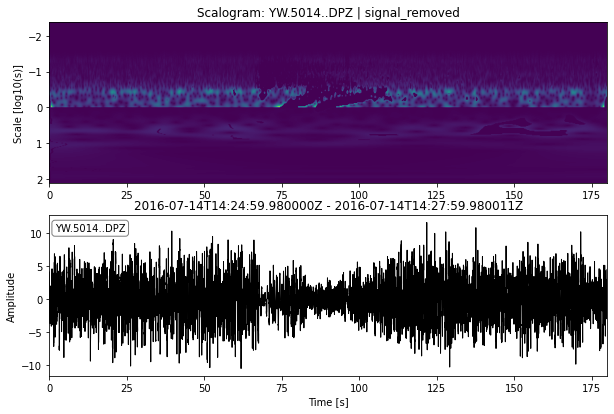

Run took 8.6711 seconds


In [12]:
# Read example data from BCseis
sacfile = "testdata/5014.YW.0.sp0011.DPZ"

start = timeit.default_timer()
params = bcs.Parameter(block_threshold=1.0, scale_min=1.0, noise_threshold="hard", signal_threshold="hard")
block = bcs.read(params=params, data=sacfile)
print(block)

# Run the denoiser
block.run()

# Plot results
block.plot("input")
block.plot("band_rejected")
block.plot("noise_removed")
block.plot("signal_removed")

end = timeit.default_timer()
print("Run took %.4f seconds"%(end - start))

#### Get stations and tags

In [13]:
# Available stations
print(block.get_station_list())

# Available tags
print(block.tags)

['YW.5014.']
['input', 'band_rejected', 'noise_removed', 'signal_removed']


Noise model estimated from 'band_rejected' data.


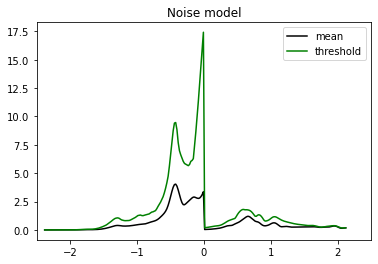

In [14]:
# Noise model outputs
plt.figure()
plt.title("Noise model")

# Get the noise model
tag = block.noise_model_tag
print("Noise model estimated from '%s' data."%tag)
waves = block.get_wavelets(tag).select(network="YW", station="5014")

# Plot figure
scales = np.log10(waves[0].scales)
plt.plot(scales, waves[0].noise_model.M,"k",label="mean")
plt.plot(scales, waves[0].noise_model.P,"g",label="threshold")
plt.xlim([-2.5, 2.5])
plt.legend()

#### Hard-thresholding

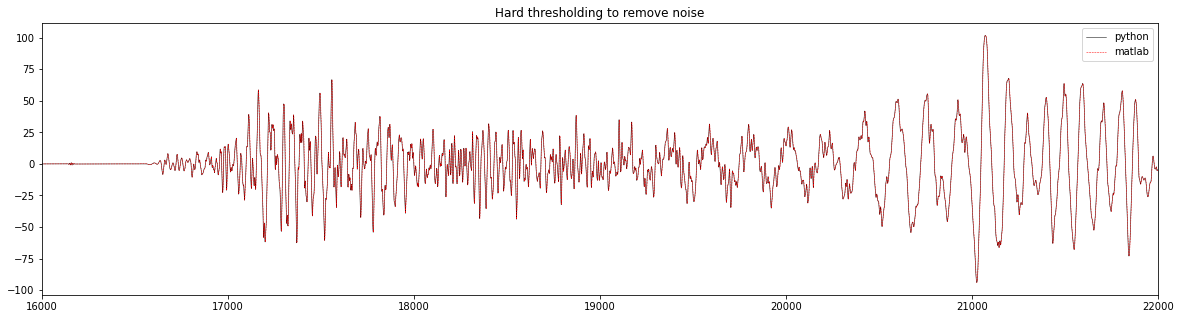

In [15]:
# Compare processed data
tag = "noise_removed"

# Select data
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_noisehard.sac",format="SAC")[0]

# Plot figure
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove noise")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

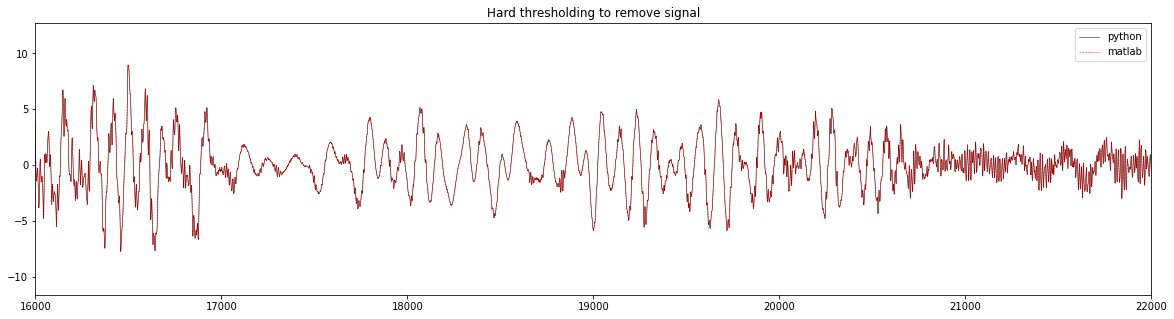

In [16]:
# Compare processed data
tag = "signal_removed"

# Select data
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_signalhard.sac",format="SAC")[0]

# Plot figure
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove signal")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

#### Soft-thresholding

In [17]:
block.params.noise_threshold="soft"
block.params.signal_threshold="soft"
block.run()

Apply new noise thresholding.
Apply new signal thresholding.


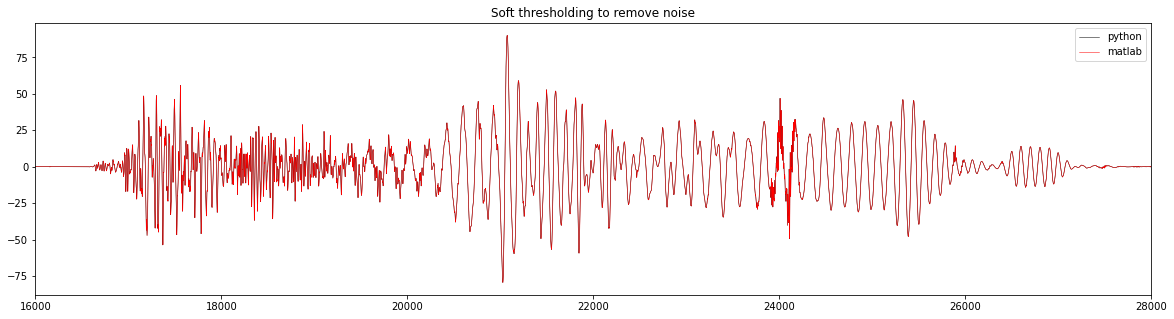

In [18]:
# Compare results
tag = "noise_removed"

# Select station
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_noisesoft.sac",format="SAC")[0]

plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove noise")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r-",linewidth=0.5,label="matlab")
plt.xlim([16000,28000])
plt.legend()

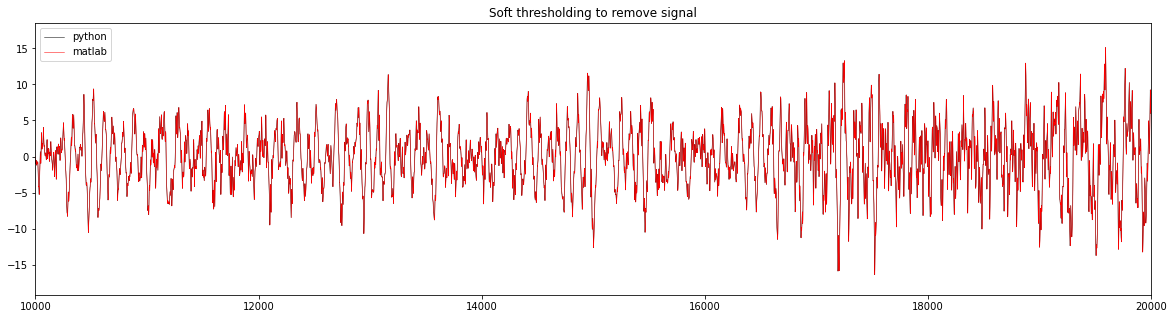

In [19]:
# Compare results
tag = "signal_removed"

# Select station
trace_py = block.waveforms.data[tag].select(network="YW", station="5014")[0]
trace_m = read("testdata/_matlab/icwtblock_signalsoft.sac",format="SAC")[0]

# Plot figure
plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove signal")
plt.plot(trace_py.data,"k",linewidth=0.5,label="python")
plt.plot(trace_m.data,"r-",linewidth=0.5,label="matlab")
plt.xlim([10000,20000])
plt.legend()

Estimate new noise model.
Apply new noise thresholding.
Apply new signal thresholding.
Available tags:
['input', 'noise_removed', 'signal_removed']


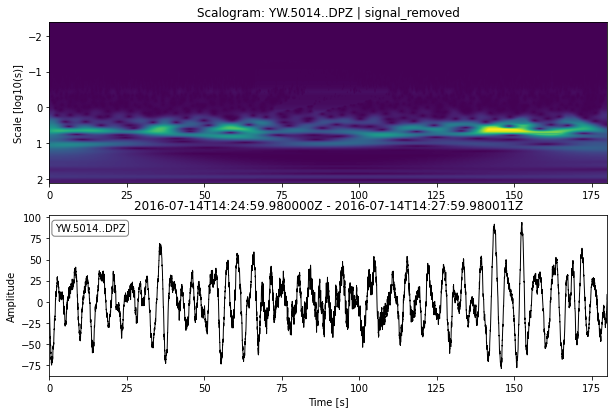

In [20]:
# Test update functions
block.params.nsigma_method = "donoho"
block.params.bandpass_blocking = False
block.params.estimate_noise = True
block.params.snr_detection = True
block.run()
print("Available tags:")
print(block.tags)
block.plot("signal_removed")

Block contains 1 trace(s):
           wave_type: morlet
             nvoices: 16
   bandpass_blocking: False
           scale_min: 1.0
           scale_max: 200.0
     block_threshold: 0.0
      estimate_noise: True
     noise_starttime: 0.0
       noise_endtime: 60.0
     noise_threshold: soft
    signal_threshold: soft
       nsigma_method: ECDF
       snr_detection: False
      snr_lowerbound: 1.0



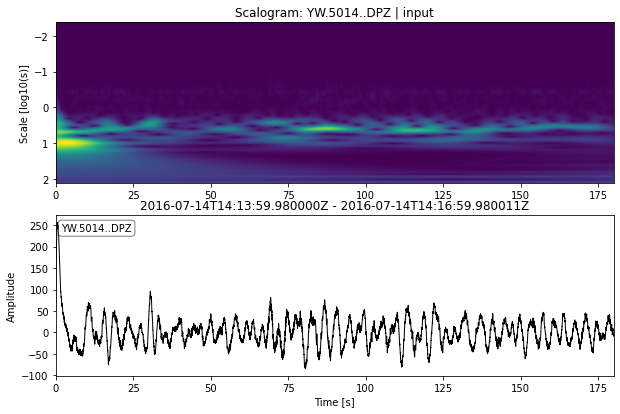

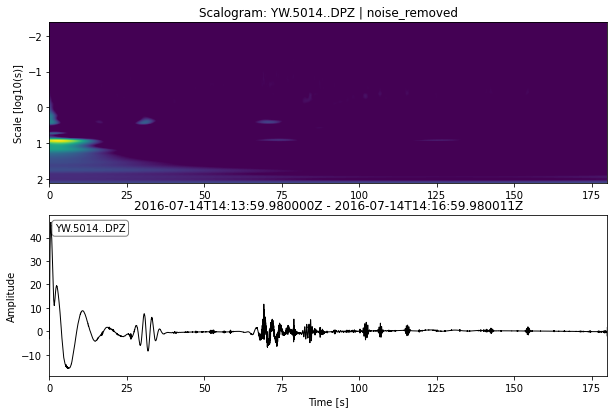

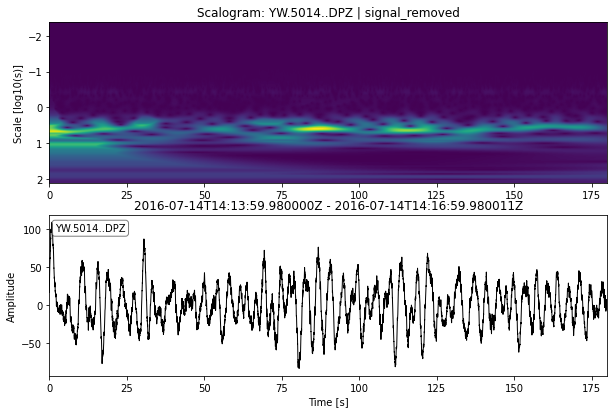

Noise model estimated from 'input' data.


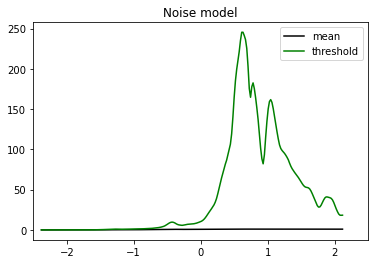

In [21]:
# Text external noise model
noise_model = block.get_wavelets(block.noise_model_tag)[0].noise_model

sacfile = "testdata/5014.YW.0.sp0012.DPZ"
params = bcs.Parameter(bandpass_blocking=False, noise_threshold="soft", signal_threshold="soft",
    external_noise_model=noise_model)
block = bcs.read(params=params, data=sacfile)
print(block)

# Run the denoiser
block.run()

# Plot results
block.plot("input")
block.plot("noise_removed")
block.plot("signal_removed")

# Noise model outputs
plt.figure()
plt.title("Noise model")

# Get the noise model
tag = block.noise_model_tag
print("Noise model estimated from '%s' data."%tag)
waves = block.get_wavelets(tag).select(network="YW", station="5014")

# Plot figure
scales = np.log10(waves[0].scales)
plt.plot(scales, waves[0].noise_model.M,"k",label="mean")
plt.plot(scales, waves[0].noise_model.P,"g",label="threshold")
plt.xlim([-2.5, 2.5])
plt.legend()

#### Test ASDF format

In [23]:
filename = "testdata/578449.h5"

params = bcs.Parameter(block_threshold=1.0, noise_threshold="hard", signal_threshold="hard")

# Initalize the block processing module
block = bcs.read(params=params, asdf_file="testdata/578449.h5")

# Event information
print(block.event)

block.run()
print(block.get_station_list())
print(block.tags)

IndexError: list index out of range

#### Test write function

In [ ]:
tag = "noise_removed"

# Waveforms
filename="junk"
output="waveforms"

# npz format
block.write(tag, output=output, format="npz")
npzfile = np.load("LB.DAC..LHR.npz")
print(npzfile.files)
block.write(tag, output=output, format="npz", filename=filename)
npzfile = np.load("junk.npz")
print(npzfile.files)

# SAC format
filename = "junk.sac"
block.write(tag, output=output, format="SAC")
block.write(tag, output=output, format="SAC", filename=filename)


In [ ]:
# CWTs
filename="junk.cwt"
output="cwt"

# npz format
block.write(tag, output=output, format="npz")
npzfile = np.load("LB.DAC..LHR.cwt.npz")
print(npzfile.files)
block.write(tag, output=output, format="npz", filename=filename)
npzfile = np.load("junk.cwt.npz")
print(npzfile.files)